# Credit Card Approval

Dataset from kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data

### Problem: 
For this project, we will aim to step into the shoes of a major credit card issuer and understand which factors correspond to what can be classified as **“good” or “bad”** customers.  Using this dataset, we will evaluate key factors such as likelihood of card approval and which customers are able to pay their balances off on time. We will analyze factors such as income, marital status, education, and occupation to collectively model these factors. Using this holistic analysis, we will be able to provide a deeper understanding of the approval process and which factors make a “good” and “bad” customer from the perspective of the company’s bottom line.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Pre-Processing

In [3]:
app = pd.read_csv('application_record.csv')
cre = pd.read_csv('credit_record.csv')

In [4]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app.shape

(438557, 18)

In [6]:
cre.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
cre.shape

(1048575, 3)

In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
app['ID'].value_counts()

ID
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

There are 438,510 unique application IDs. Let's create an 'approved' column depending on whether the ID exists in the credit file. 

In [10]:
cre['ID'].value_counts()

ID
5016769    61
5002806    61
5118192    61
5145767    61
5078567    61
           ..
5028795     1
5148442     1
5053900     1
5046332     1
5079047     1
Name: count, Length: 45985, dtype: int64

In [11]:
approved_ids = set(cre['ID'].unique())

app['Approved'] = app['ID'].apply(lambda x: 1 if x in approved_ids else 0)
app['Approved'].value_counts()

Approved
0    402100
1     36457
Name: count, dtype: int64

In [12]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approved
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1


In [13]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64

The only feature with null values are OCCUPATION_TYPE, and there is too much diversity of categories within the dataset. The NAME_INCOME_TYPE and AMT_TOTAL_INCOME variables should be sufficient in explaining how someone receives their income.

We can also drop columns that don't have much significant value in understanding whether someone's getting approved for credit card or not. 

In [15]:
drop_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']

for x in drop_cols:
    if x in app.columns:
        app.drop(x, axis = 1, inplace=True)

app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Approved
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,1


Converting DAYS_EMPLOYED and DAYS_BIRTH to yearly values. 

In [16]:
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].replace(365243, np.nan)

In [17]:
app['DAYS_EMPLOYED'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 438557 entries, 0 to 438556
Series name: DAYS_EMPLOYED
Non-Null Count   Dtype  
--------------   -----  
363228 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [18]:
app['DAYS_EMPLOYED'].describe()

count    363228.000000
mean      -2623.052700
std        2399.514253
min      -17531.000000
25%       -3512.000000
50%       -1924.000000
75%        -915.000000
max         -12.000000
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].interpolate()

In [20]:
app['DAYS_EMPLOYED'].describe()

count    438557.000000
mean      -2597.038028
std        2312.346612
min      -17531.000000
25%       -3472.000000
50%       -1942.000000
75%        -961.000000
max         -12.000000
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
app['YEARS_EMPLOYED'] = app['DAYS_EMPLOYED']/-365

In [22]:
app['YEARS_EMPLOYED'].value_counts()

YEARS_EMPLOYED
0.597260     264
4.597260     254
2.679452     252
1.178082     242
0.682192     242
            ... 
17.845662      1
19.826712      1
21.807763      1
23.788813      1
7.738630       1
Name: count, Length: 61404, dtype: int64

In [23]:
app['YEARS_EMPLOYED_BUCKET'] = pd.cut(app['YEARS_EMPLOYED'], 
                                       bins=[0, 3, 10, float('inf')], 
                                       labels= [0, 1, 2], 
                                       right=False)


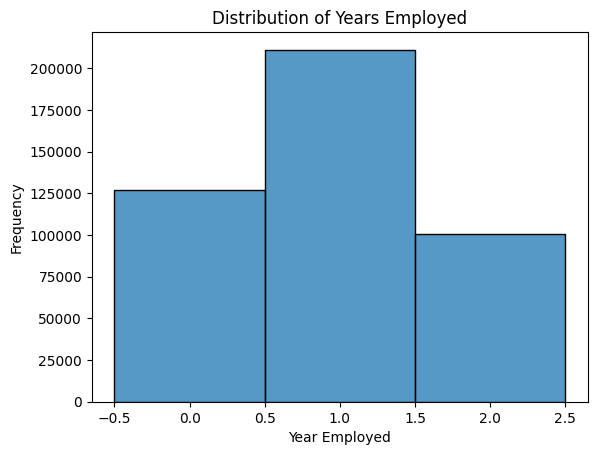

In [24]:
sns.histplot(app['YEARS_EMPLOYED_BUCKET'], discrete=True, kde=False)

plt.xlabel('Year Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Years Employed')
plt.show()

In [25]:
app.drop(columns = ['YEARS_EMPLOYED'], inplace = True)

In [26]:
app['AGE'] = app['DAYS_BIRTH']/-365

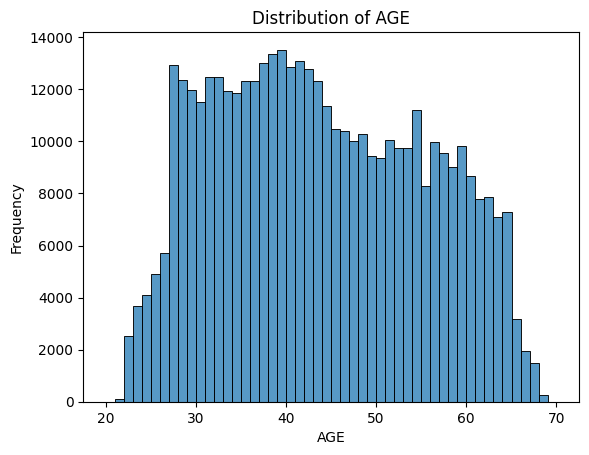

In [27]:
sns.histplot(app['AGE'], discrete=True, kde=False)

plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Distribution of AGE')
plt.show()

In [28]:
drop_cols = ['DAYS_EMPLOYED', 'DAYS_BIRTH']

for x in drop_cols:
    if x in app.columns:
        app.drop(x, axis = 1, inplace=True)

In [29]:
# confirming these features are convertible to binary values

print(app['CODE_GENDER'].value_counts())
print(app['FLAG_OWN_CAR'].value_counts())
print(app['FLAG_OWN_REALTY'].value_counts())


CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64


CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY are currently objects. It would make sense to convert these columns to binary values. 

In [30]:
# Convert CODE_GENDER: 'F'->0, 'M'->1
app['CODE_GENDER'] = app['CODE_GENDER'].map({'F': 0, 'M': 1})

# Convert FLAG_OWN_CAR: 'N'->0, 'Y'->1
app['FLAG_OWN_CAR'] = app['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})

# Convert FLAG_OWN_REALTY: 'N'->0, 'Y'->1
app['FLAG_OWN_REALTY'] = app['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})


In [31]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,Approved,YEARS_EMPLOYED_BUCKET,AGE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,1,2,32.890411
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,1,2,32.890411
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,1,1,58.832877
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,1,1,52.356164
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,1,1,52.356164


In [32]:
print(app['NAME_INCOME_TYPE'].value_counts())

print(app['NAME_EDUCATION_TYPE'].value_counts())

print(app['NAME_FAMILY_STATUS'].value_counts())

print(app['NAME_HOUSING_TYPE'].value_counts())


NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


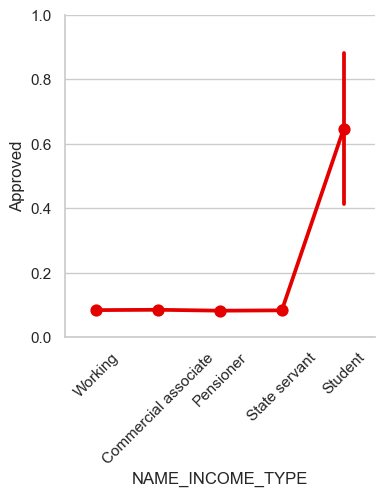

In [33]:
sns.set(style = 'whitegrid')
g = sns.PairGrid(data=app, x_vars=['NAME_INCOME_TYPE'], y_vars='Approved', height=4)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 1))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to avoid overlap

plt.show()

Students are significantly different from other income types but there are only 17 students in the dataset. 

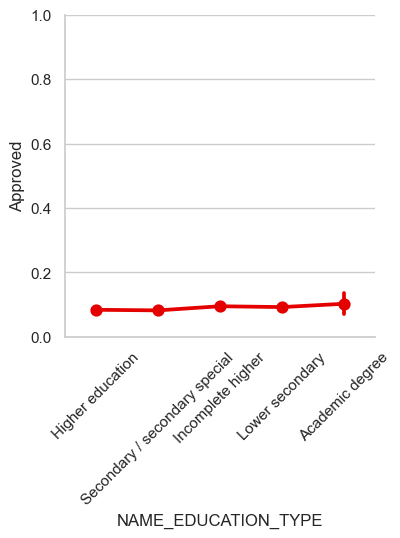

In [34]:
sns.set(style = 'whitegrid')
g = sns.PairGrid(data=app, x_vars=['NAME_EDUCATION_TYPE'], y_vars='Approved', height=4)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 1))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to avoid overlap

plt.show()

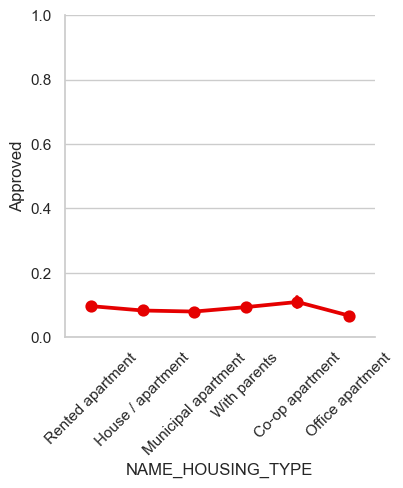

In [35]:
sns.set(style = 'whitegrid')
g = sns.PairGrid(data=app, x_vars=['NAME_HOUSING_TYPE'], y_vars='Approved', height=4)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 1))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to avoid overlap

plt.show()

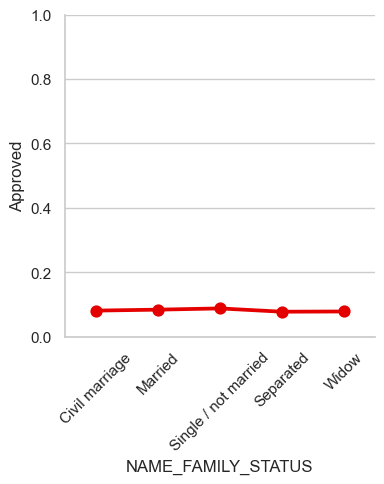

In [36]:
sns.set(style = 'whitegrid')
g = sns.PairGrid(data=app, x_vars=['NAME_FAMILY_STATUS'], y_vars='Approved', height=4)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 1))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to avoid overlap

plt.show()

In [37]:
app = pd.get_dummies(app, columns=['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE'], dtype = int)

In [38]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 31 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ID                                                 438557 non-null  int64   
 1   CODE_GENDER                                        438557 non-null  int64   
 2   FLAG_OWN_CAR                                       438557 non-null  int64   
 3   FLAG_OWN_REALTY                                    438557 non-null  int64   
 4   CNT_CHILDREN                                       438557 non-null  int64   
 5   AMT_INCOME_TOTAL                                   438557 non-null  float64 
 6   CNT_FAM_MEMBERS                                    438557 non-null  float64 
 7   Approved                                           438557 non-null  int64   
 8   YEARS_EMPLOYED_BUCKET                              438557 non-nu

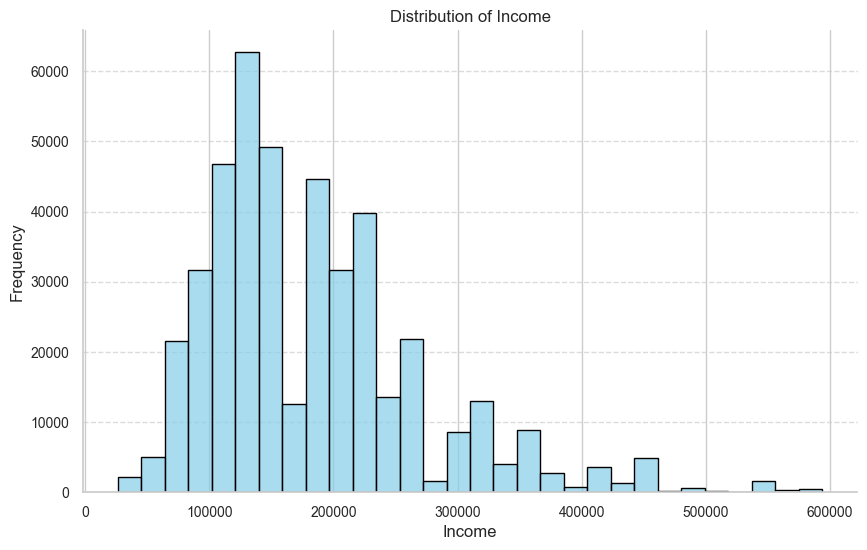

In [39]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=app[app['AMT_INCOME_TOTAL'] <= 600000], x='AMT_INCOME_TOTAL', bins=30,
                  color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [40]:
app['INCOME_BUCKET'] = pd.cut(app['AMT_INCOME_TOTAL'],
                             bins=[-float("inf"), 100000, 200000, 300000, float("inf")],
                             labels=[0, 1, 2, 3])

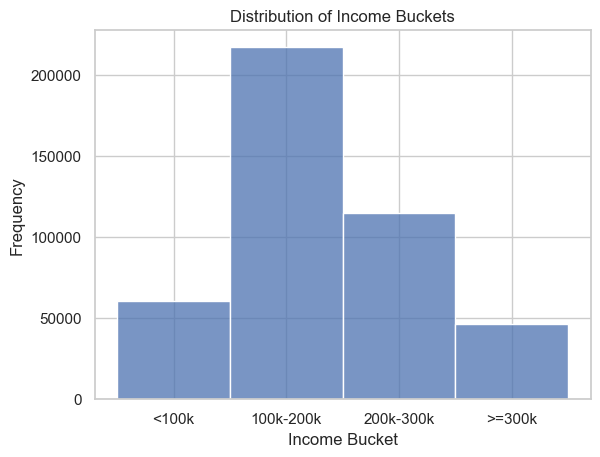

In [41]:
sns.histplot(app['INCOME_BUCKET'], discrete=True, kde=False)

plt.xlabel('Income Bucket')
plt.ylabel('Frequency')
plt.title('Distribution of Income Buckets')
plt.xticks(range(4), labels=['<100k', '100k-200k', '200k-300k', '>=300k'])  # Optional: Customizing x-ticks for clarity
plt.show()

In [42]:
app.drop(columns = ['AMT_INCOME_TOTAL'], inplace = True)

In [43]:
df = app.drop('ID', axis=1)
              
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 30 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   CODE_GENDER                                        438557 non-null  int64   
 1   FLAG_OWN_CAR                                       438557 non-null  int64   
 2   FLAG_OWN_REALTY                                    438557 non-null  int64   
 3   CNT_CHILDREN                                       438557 non-null  int64   
 4   CNT_FAM_MEMBERS                                    438557 non-null  float64 
 5   Approved                                           438557 non-null  int64   
 6   YEARS_EMPLOYED_BUCKET                              438557 non-null  category
 7   AGE                                                438557 non-null  float64 
 8   NAME_INCOME_TYPE_Commercial associate              438557 non-nu

In [44]:
correlation_matrix = df.corr()

correlation_matrix

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,Approved,YEARS_EMPLOYED_BUCKET,AGE,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,INCOME_BUCKET
CODE_GENDER,1.000000,0.346580,-0.041982,0.086101,0.114188,0.000820,-0.073694,-0.193781,0.044620,-0.168437,...,0.109990,-0.070847,0.011117,-0.129182,-0.007561,-0.013127,0.037379,0.014552,-0.004614,0.197475
FLAG_OWN_CAR,0.346580,1.000000,-0.001312,0.115138,0.156943,0.004866,-0.015792,-0.163770,0.065853,-0.165839,...,0.140325,-0.061768,-0.059479,-0.110585,-0.002837,0.091288,0.021100,-0.017338,-0.091779,0.202193
FLAG_OWN_REALTY,-0.041982,-0.001312,1.000000,0.001560,0.008070,-0.013819,0.010809,0.106908,0.010698,0.064382,...,0.014737,-0.011031,-0.026868,0.026333,0.005133,-0.012036,-0.017852,-0.010481,0.020348,0.029922
CNT_CHILDREN,0.086101,0.115138,0.001560,1.000000,0.884781,0.001215,-0.031133,-0.349088,0.033122,-0.242349,...,0.161511,-0.028091,-0.128924,-0.097405,-0.004052,0.036330,0.009127,-0.003399,-0.037365,0.019941
CNT_FAM_MEMBERS,0.114188,0.156943,0.008070,0.884781,1.000000,0.001338,-0.005335,-0.306179,0.031037,-0.234841,...,0.511106,-0.242826,-0.426857,-0.264013,-0.003114,0.025966,-0.002824,-0.007512,-0.021993,0.007071
Approved,0.000820,0.004866,-0.013819,0.001215,0.001338,1.000000,0.009705,-0.001635,0.002241,-0.002706,...,0.002193,-0.005555,0.005832,-0.004132,0.001878,0.001762,0.008011,0.003215,-0.005585,-0.000504
YEARS_EMPLOYED_BUCKET,-0.073694,-0.015792,0.010809,-0.031133,-0.005335,0.009705,1.000000,0.208784,-0.069752,0.022364,...,0.060698,0.003578,-0.075446,0.031535,0.004758,-0.012298,-0.047105,-0.009942,0.031932,0.025585
AGE,-0.193781,-0.163770,0.106908,-0.349088,-0.306179,-0.001635,0.208784,1.000000,-0.157913,0.621478,...,-0.015627,0.048288,-0.122384,0.246383,0.002182,-0.124420,-0.138550,0.037055,0.165284,-0.079495
NAME_INCOME_TYPE_Commercial associate,0.044620,0.065853,0.010698,0.033122,0.031037,0.002241,-0.069752,-0.157913,1.000000,-0.249040,...,-0.006882,0.006156,0.023056,-0.062904,-0.000138,0.103239,0.037610,-0.024517,-0.108325,0.181110
NAME_INCOME_TYPE_Pensioner,-0.168437,-0.165839,0.064382,-0.242349,-0.234841,-0.002706,0.022364,0.621478,-0.249040,1.000000,...,-0.052126,0.003579,-0.038735,0.228101,-0.006277,-0.102573,-0.062562,0.056236,0.111250,-0.170664


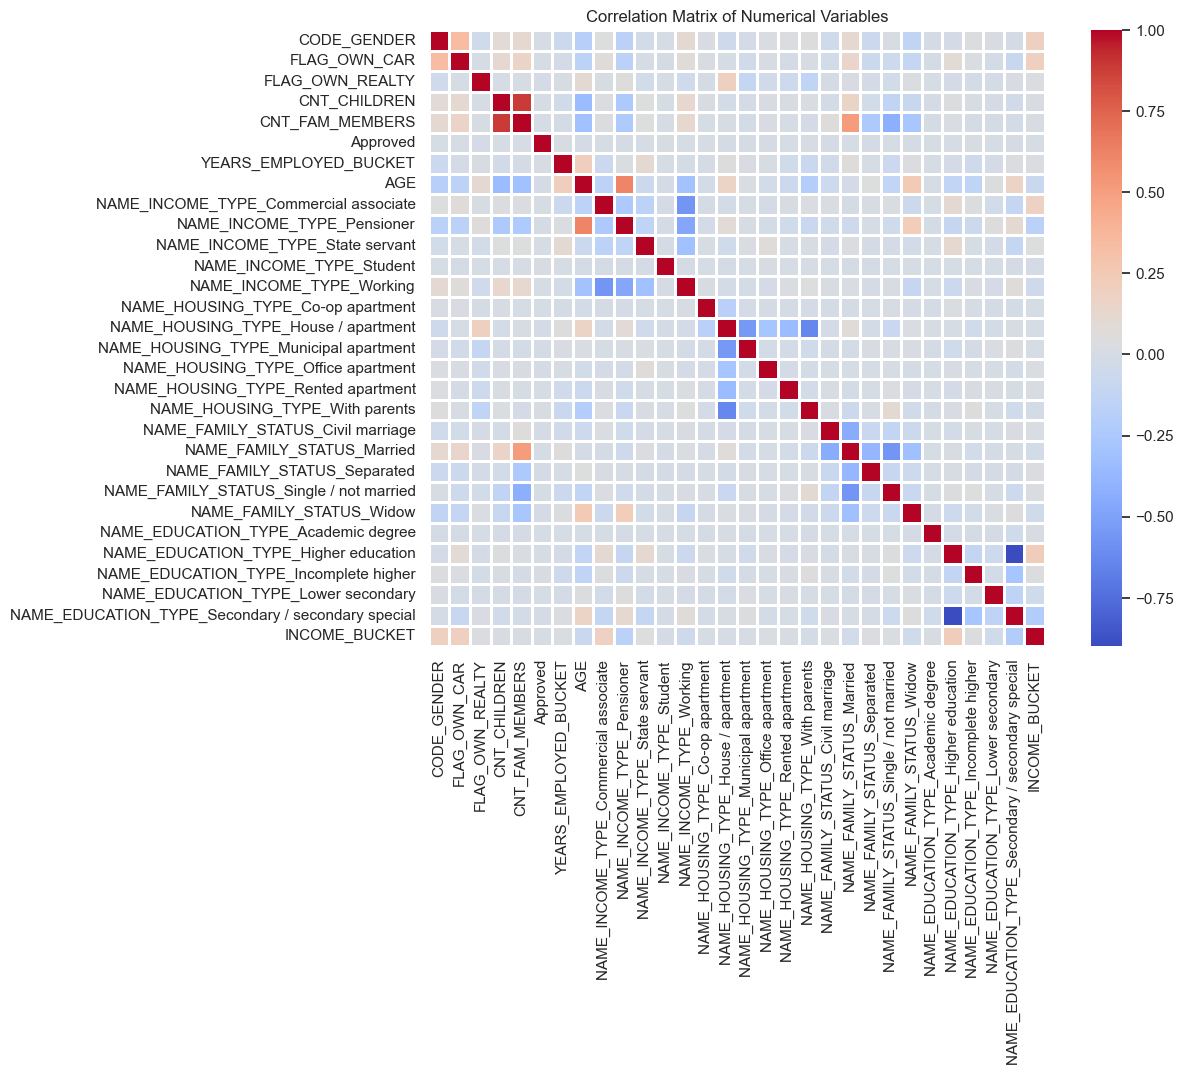

In [45]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=2)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

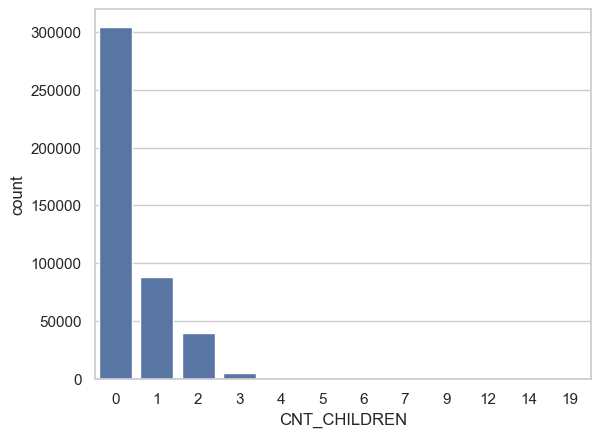

In [46]:
sns.countplot(x='CNT_CHILDREN', data = app)


<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

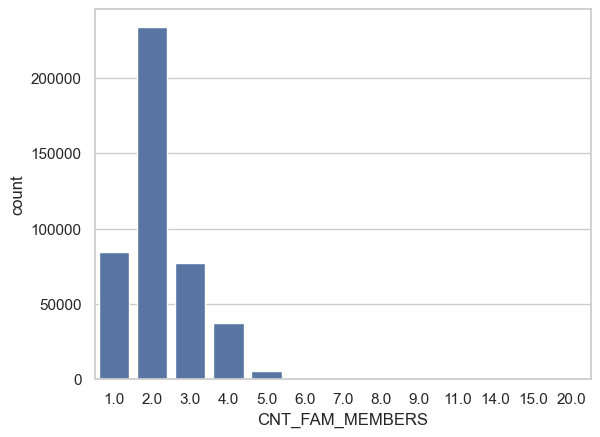

In [47]:
sns.countplot(x='CNT_FAM_MEMBERS', data = app)


# Feature Selection and SMOTE Oversampling

In [48]:
app['YEARS_EMPLOYED_BUCKET'] = app['YEARS_EMPLOYED_BUCKET'].cat.codes
app['INCOME_BUCKET'] = app['INCOME_BUCKET'].cat.codes

In [49]:
X, y = app.drop(['Approved', 'ID'], axis = 1), app['Approved']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape

(350845, 29)

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [54]:
y_train_smote.value_counts()

Approved
0    321779
1    321779
Name: count, dtype: int64

In [55]:
X_train_smote.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,YEARS_EMPLOYED_BUCKET,AGE,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,INCOME_BUCKET
0,1,1,1,1,3.0,0,33.849315,0,0,0,...,1,0,0,0,0,0,0,0,1,3
1,0,0,1,1,3.0,1,43.317808,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,0,0,1,2,4.0,0,39.227397,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,1,1,0,2.0,1,35.205479,0,0,0,...,1,0,0,0,0,0,0,0,1,2
4,0,0,0,0,2.0,1,43.158904,1,0,0,...,0,0,0,0,0,0,0,0,1,1


### Forward Selection

In [56]:
import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features


In [57]:
selected_features = forward_selection(X_train_smote, y_train_smote)
print(selected_features)

['FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_Co-op apartment', 'CODE_GENDER', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Widow', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_INCOME_TYPE_State servant', 'INCOME_BUCKET', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_Pensioner', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE', 'FLAG_OWN_CAR']


In [58]:
len(selected_features)

28

In [59]:
X_train_reduced = X_train_smote[selected_features]
X_test_reduced = X_test[selected_features]

In [60]:
X_train_reduced.shape

(643558, 28)

In [61]:
X_train_reduced.head()

,FLAG_OWN_REALTY,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Co-op apartment,CODE_GENDER,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Civil marriage,...,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Pensioner,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,FLAG_OWN_CAR
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,3.0,33.849315,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,3.0,43.317808,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2,4.0,39.227397,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,2.0,35.205479,1
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2.0,43.158904,0


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_array = scaler.fit_transform(X_train_reduced)
X_test_scaled_array = scaler.transform(X_test_reduced)

X_train_scaled = pd.DataFrame(X_train_scaled_array, index=X_train_reduced.index, columns=X_train_reduced.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, index=X_test_reduced.index, columns=X_test_reduced.columns)

In [63]:
X_train_scaled.head()

,FLAG_OWN_REALTY,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Co-op apartment,CODE_GENDER,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Civil marriage,...,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Pensioner,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,FLAG_OWN_CAR
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.052632,0.105263,0.274729,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.052632,0.105263,0.469851,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.105263,0.157895,0.385558,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.052632,0.302676,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.052632,0.466576,0.0


In [64]:
# pca = PCA(n_components=0.95)  # Adjust n_components for desired explained variance
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [65]:
# X_train_pca.shape

In [66]:
# n_components = len(pca.explained_variance_ratio_)
# explained_variance = pca.explained_variance_ratio_
# cum_explained_variance = np.cumsum(explained_variance)
# idx = np.arange(n_components)+1
# df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
#                                      index=['explained variance', 'cumulative'], 
#                                      columns=idx).T
# mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# # (iii.) Print explained variance as plain text
# print('PCA Overview')
# print('='*40)
# print("Total: {} components".format(n_components))
# print('-'*40)
# print('Mean explained variance:', round(mean_explained_variance,3))
# print('-'*40)
# print(df_explained_variance.head(20))
# print('-'*40)
# PCA Overview 
# ======================================== 
# Total: 10 components 
# ---------------------------------------- 
# Mean explained variance: 0.1 
# ---------------------------------------- 
# explained variance cumulative 
# 1 0.265261 0.265261 
# 2 0.122700 0.387962 
# 3 0.113990 0.501951 
# 4 0.099139 0.601090 
# 5 0.094357 0.695447 
# 6 0.083412 0.778859 
# 7 0.063117 0.841976 
# 8 0.056386 0.898362 
# 9 0.052588 0.950950 
# 10 0.049050 1.000000 
# ----------------------------------------

### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_smote)
predicted = rf.predict(X_test_scaled)


# Calculate the Mean Squared Error
rmse = mean_squared_error(y_test, predicted, squared = False)
print(f'Root Mean Squared Error: {rmse}')

print(metrics.accuracy_score(y_test, predicted))

print('Classification report:\n', metrics.classification_report(y_test, predicted))
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)


Root Mean Squared Error: 0.1829879392679975
0.9665154140824517
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     80321
           1       0.77      0.87      0.81      7391

    accuracy                           0.97     87712
   macro avg       0.88      0.92      0.90     87712
weighted avg       0.97      0.97      0.97     87712

Confusion matrix:
 [[78379  1942]
 [  995  6396]]


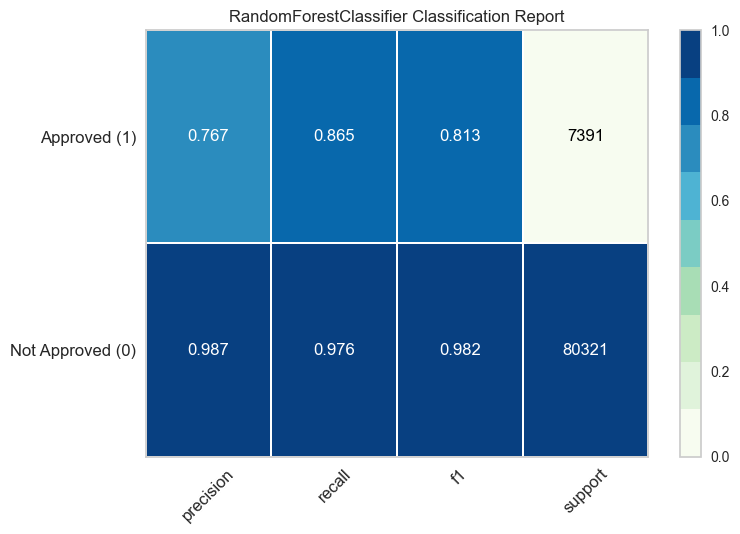

In [68]:
# ! pip install yellowbrick
from yellowbrick.classifier import ClassificationReport

classes = ['Not Approved (0)', 'Approved (1)']
vizualizer = ClassificationReport(rf, classes=classes, support=True, cmap = 'GnBu')
vizualizer.fit(X_train_scaled, y_train_smote)
vizualizer.score(X_test_scaled, y_test)
vizualizer.show();

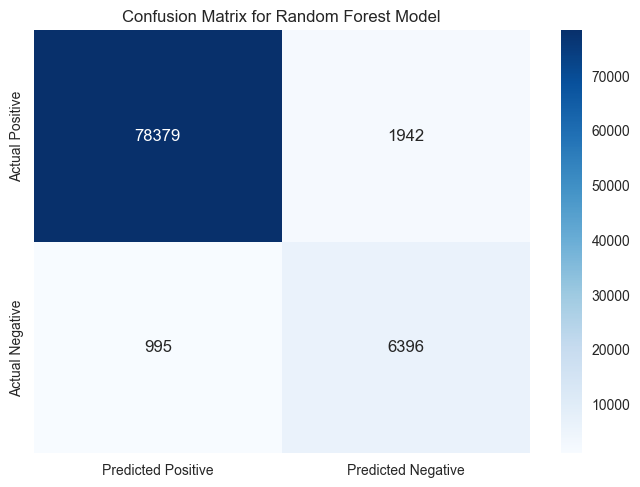

In [69]:
# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to our data
logreg = LogisticRegression(random_state = 42, max_iter=1000)
logreg.fit(X_train_reduced, y_train_smote)

# Obtain model predictions
predicted = logreg.predict(X_test_reduced)


# Print the classifcation report and confusion matrix

rmse = mean_squared_error(y_test, predicted, squared = False)
print(f'Root Mean Squared Error: {rmse}')

print('Classification report:\n', metrics.classification_report(y_test, predicted))
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Root Mean Squared Error: 0.5358159073886534
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     80321
           1       0.08      0.24      0.13      7391

    accuracy                           0.71     87712
   macro avg       0.50      0.50      0.48     87712
weighted avg       0.85      0.71      0.77     87712

Confusion matrix:
 [[60728 19593]
 [ 5589  1802]]


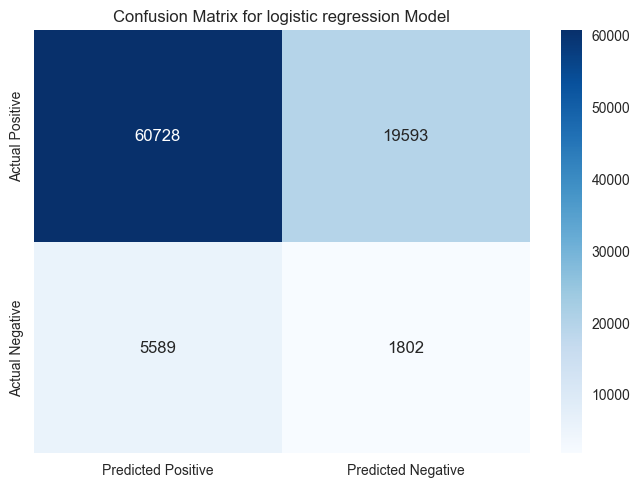

In [71]:
# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

# Explaining Feature Importance

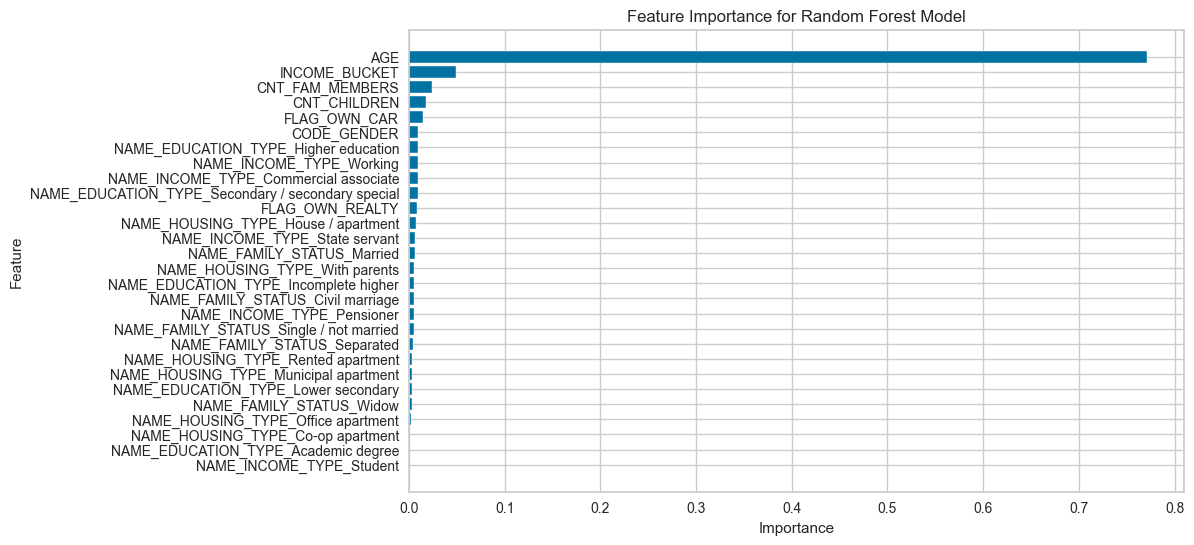

In [72]:
importances = rf.feature_importances_

feature_names = X_train_scaled.columns

# convert importances into a dataframe
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort Dataframe to make it easier to plot
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

#Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature on the top
plt.show()

## SHAP

In [73]:
# pip install git+https://github.com/slundberg/shap.git

In [74]:
import shap

X_test_shap_sample = X_test_scaled.sample(n=500, random_state=42)

explainer = shap.Explainer(rf.predict, X_test_shap_sample)
shap_values = explainer(X_test_shap_sample)

PermutationExplainer explainer: 501it [02:29,  3.17it/s]                        


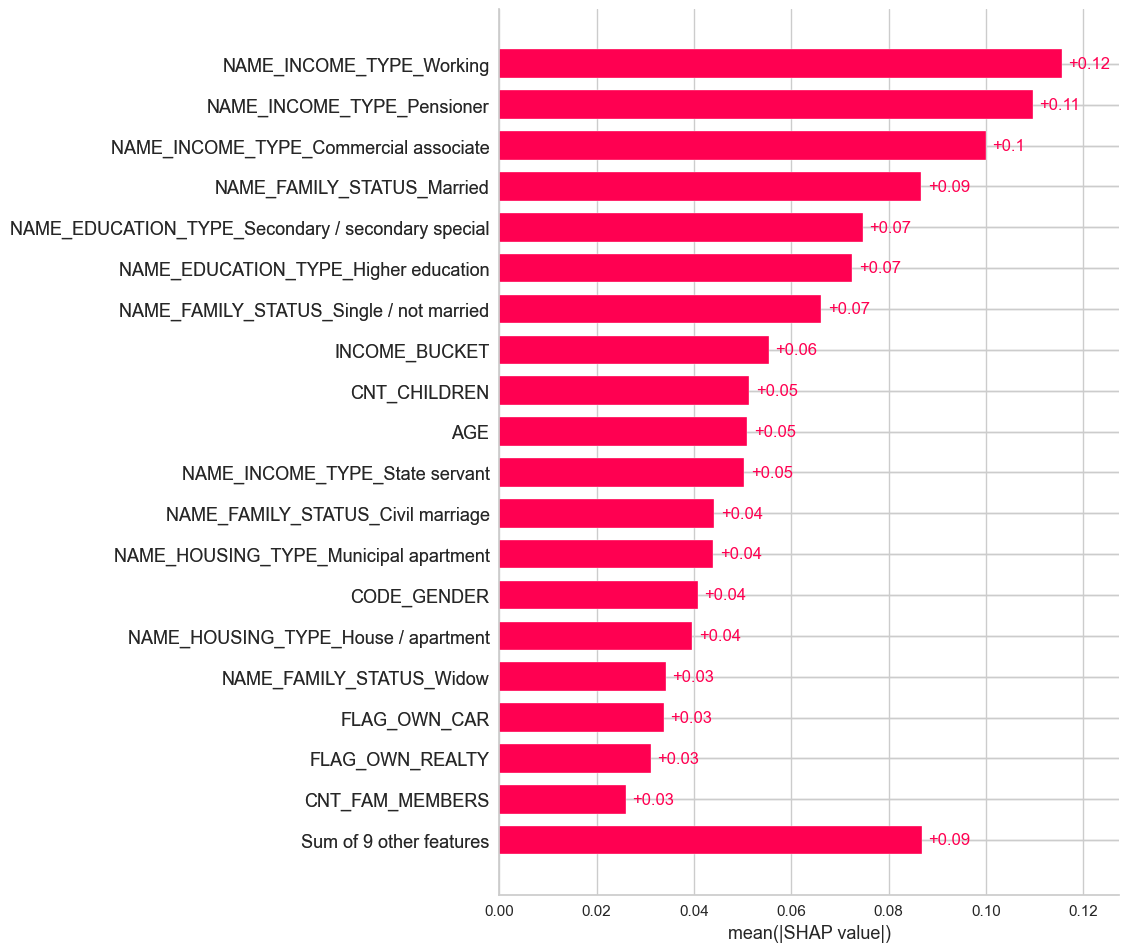

In [75]:
shap.plots.bar(shap_values, max_display = 20)

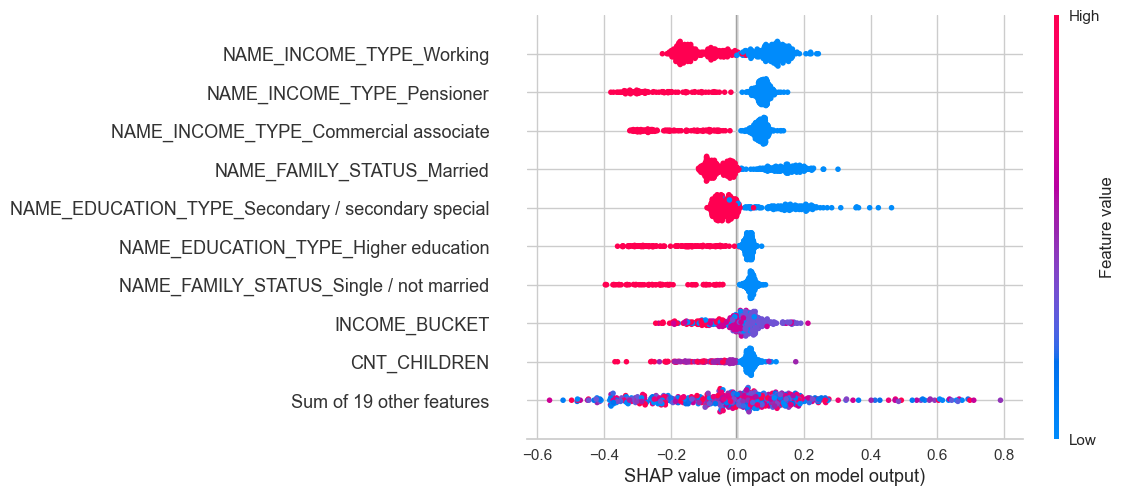

In [76]:
shap.plots.beeswarm(shap_values)

It's more important that someone is NOT working for credit approval. 

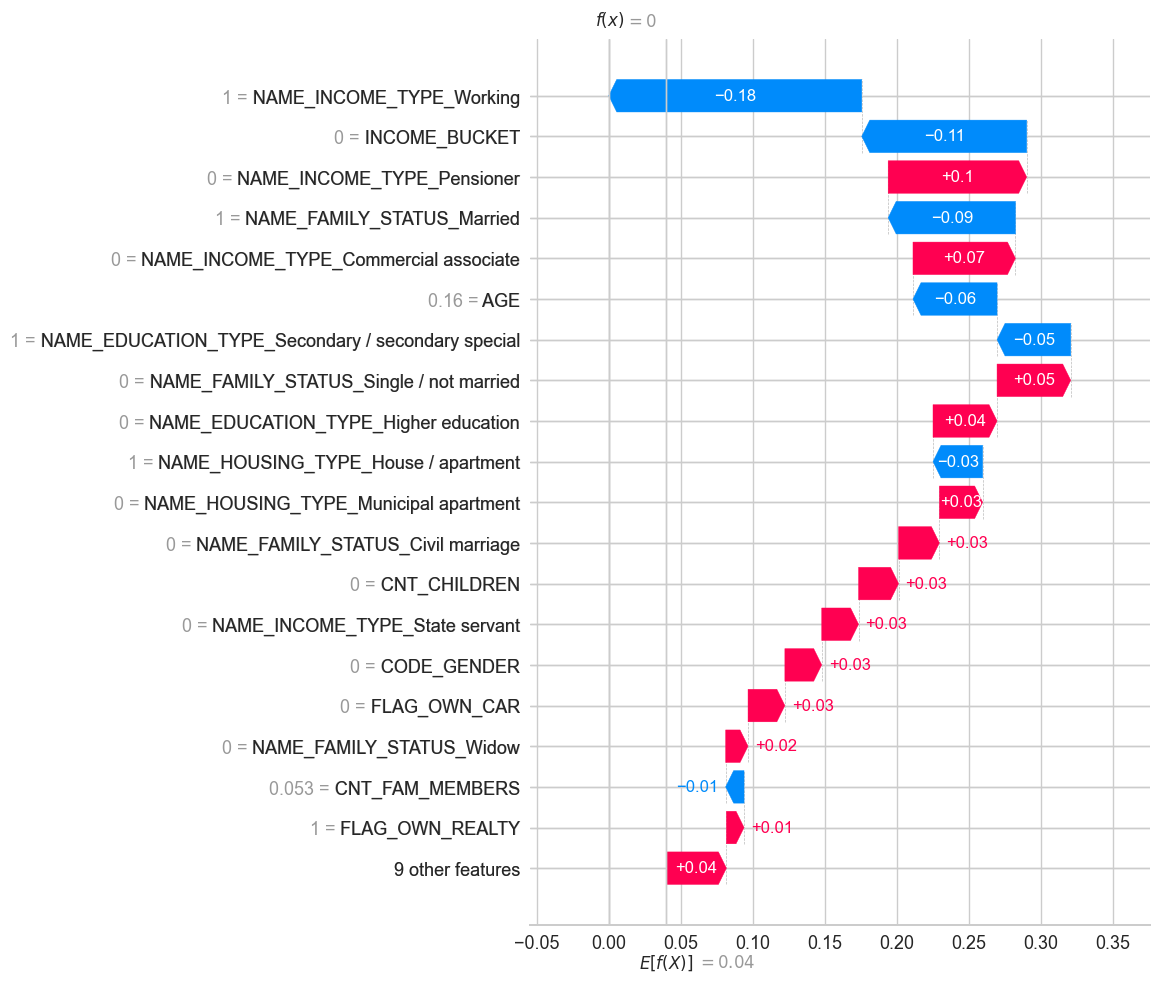

In [77]:
shap.plots.waterfall(shap_values[90], max_display=20)


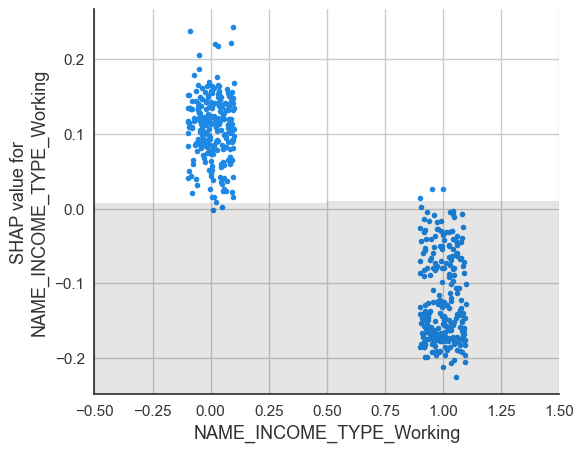

In [78]:
shap.plots.scatter(shap_values[:, "NAME_INCOME_TYPE_Working"])


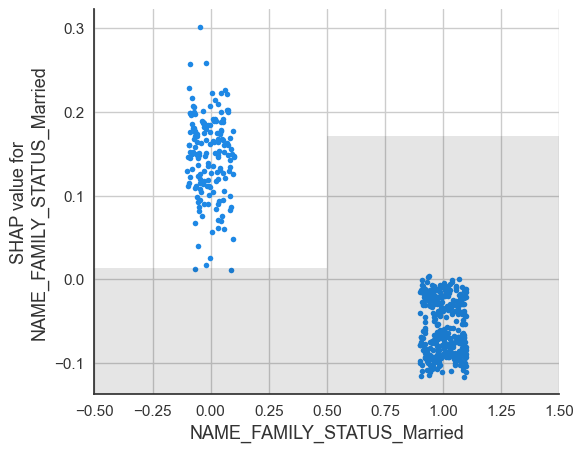

In [79]:
shap.plots.scatter(shap_values[:, "NAME_FAMILY_STATUS_Married"])

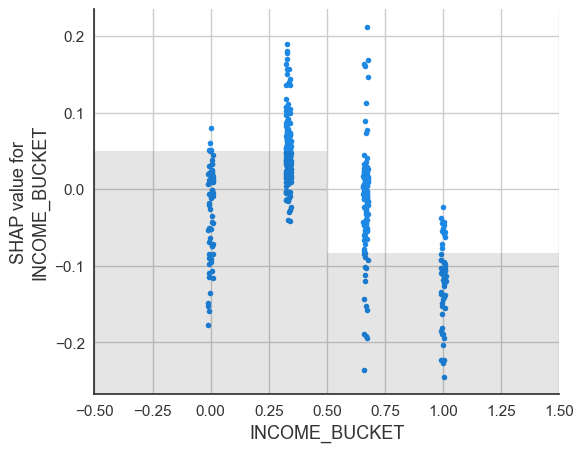

In [80]:
shap.plots.scatter(shap_values[:, "INCOME_BUCKET"])

## Explainable Boosting Machine

In [81]:
# ! pip install interpret
from interpret.glassbox import ExplainableBoostingClassifier

seed = 50

ebm = ExplainableBoostingClassifier(random_state=seed)

ebm.fit(X_train_scaled, y_train_smote)

ExplainableBoostingClassifier(random_state=50)

In [82]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/6246419344/ -->

# Part 2: Credit Score Prediction

In [112]:
cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [150]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 31 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  int64  
 1   CODE_GENDER                                        438557 non-null  int64  
 2   FLAG_OWN_CAR                                       438557 non-null  int64  
 3   FLAG_OWN_REALTY                                    438557 non-null  int64  
 4   CNT_CHILDREN                                       438557 non-null  int64  
 5   AMT_INCOME_TOTAL                                   438557 non-null  float64
 6   CNT_FAM_MEMBERS                                    438557 non-null  float64
 7   Approved                                           438557 non-null  int64  
 8   YEARS_EMPLOYED                                     438557 non-null  float6

In [151]:
combined = pd.merge(app, cre, on='ID', how='inner')

In [152]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 33 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 777715 non-null  int64  
 1   CODE_GENDER                                        777715 non-null  int64  
 2   FLAG_OWN_CAR                                       777715 non-null  int64  
 3   FLAG_OWN_REALTY                                    777715 non-null  int64  
 4   CNT_CHILDREN                                       777715 non-null  int64  
 5   AMT_INCOME_TOTAL                                   777715 non-null  float64
 6   CNT_FAM_MEMBERS                                    777715 non-null  float64
 7   Approved                                           777715 non-null  int64  
 8   YEARS_EMPLOYED                                     777715 non-null  float6

In [153]:
combined.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Approved,YEARS_EMPLOYED,AGE,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,0,C
1,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-1,C
2,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-2,C
3,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-3,C
4,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-4,C


In [154]:
combined['STATUS'].replace('C', 800, inplace=True)
combined['STATUS'].replace('0' ,700, inplace=True)
combined['STATUS'].replace('1' ,600, inplace=True)
combined['STATUS'].replace('2' ,500, inplace=True)
combined['STATUS'].replace('3' ,400, inplace=True)
combined['STATUS'].replace('4' ,300, inplace=True)
combined['STATUS'].replace('5' ,200, inplace=True)
combined['STATUS'].replace('X' ,600, inplace=True)

In [155]:
combined.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Approved,YEARS_EMPLOYED,AGE,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,0,800
1,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-1,800
2,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-2,800
3,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-3,800
4,5008804,1,1,1,0,427500.0,2.0,1,12.443836,32.890411,...,0,0,0,0,1,0,0,0,-4,800


In [156]:
combined['STATUS'].value_counts()

STATUS
800    329536
700    290654
600    154697
200      1527
500       801
400       286
300       214
Name: count, dtype: int64

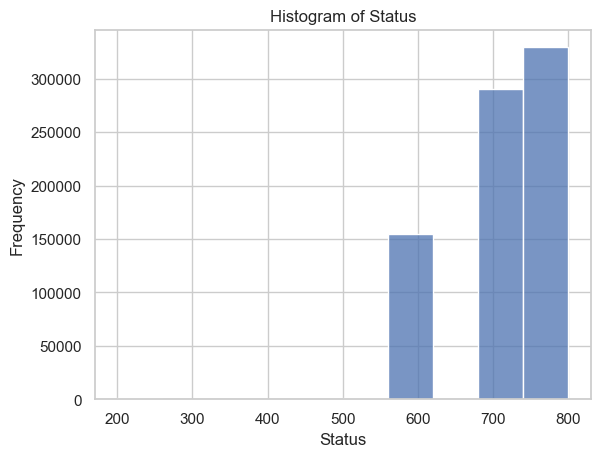

In [143]:
sns.histplot(combined['STATUS'], bins=10, kde=False)  # You can adjust the number of bins as needed
plt.xlabel('Status')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Status')  # Set the title of the histogram
plt.show()  # Display the plot

In [121]:
X, y = combined.drop(['Approved', 'STATUS'], axis = 1), combined['STATUS']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
y_train

693166    800
474525    700
614458    600
261954    700
151635    600
         ... 
359783    800
152315    700
117952    800
435829    800
305711    800
Name: STATUS, Length: 622172, dtype: int64

In [124]:
rf = RandomForestClassifier(n_estimators=400,
min_samples_leaf=0.12,
random_state=42)

In [125]:
rf.fit(X_train, y_train)
y_pred_credit_score = rf.predict(X_test)

In [126]:
acc_random_forest = accuracy_score(y_test, y_pred_credit_score)
accuracy = round(acc_random_forest * 100, 2)
print(str(accuracy) + ' percent')

47.16 percent


In [137]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_cs = dt.predict(X_test)

y_pred_cs

array([800., 600., 700., ..., 700., 600., 800.])

In [136]:
acc_random_forest = accuracy_score(y_test, y_pred_cs)
accuracy = round(acc_random_forest * 100, 2)
print(str(accuracy) + ' percent')

88.05 percent


In [141]:
# Print the classifcation report
print('Classification report:\n', metrics.classification_report(y_test, y_pred_cs))

Classification report:
               precision    recall  f1-score   support

         200       0.87      0.85      0.86       285
         300       0.13      0.15      0.14        41
         400       0.15      0.13      0.14        61
         500       0.17      0.17      0.17       161
         600       0.78      0.78      0.78     31068
         700       0.85      0.86      0.85     58074
         800       0.96      0.95      0.96     65853

    accuracy                           0.88    155543
   macro avg       0.56      0.55      0.56    155543
weighted avg       0.88      0.88      0.88    155543

